# Assignment 4 - Online Retailing: Demand Prediction and Price Optimization
## Prepared by: Achchala Deepan

In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools

In [2]:
feature_definitions = pd.read_csv('Feature_Definitions.csv')
demand_dataset = pd.read_csv('Demand_Dataset.csv')

feature_definitions.head(), demand_dataset.head()

(  Sales  data for 24 hour events in 2021  Unnamed: 1  \
 0                                 Column       Label   
 1                                      A    Event ID   
 2                                      B  Department   
 3                                 Column  Start time   
 4                                      D     Weekday   
 
                                           Unnamed: 2  
 0                                         Definition  
 1                            Unique event identifier  
 2  Department event styles beling to A=women's, ,...  
 3  Start time of the event, 1100=11am, 1700=5pm, ...  
 4  Indicates whether it is a  weekday event, 1 if...  ,
    Event ID Department  Start Time  Weekday  Type   1   2    3    4    5  ...  \
 0         1          B        1100        0     0  41  48   70   83   87  ...   
 1         2          C        1100        0     0  53  96  100  208  211  ...   
 2         3          A        2000        0     1   7   8   20   20   22

In [3]:
sales_columns = [str(i) for i in range(1, 25)]
sales_data = demand_dataset[sales_columns]
scaler = StandardScaler()
normalized_sales = scaler.fit_transform(sales_data)

In [4]:
methods = [
    ("euclidean", "ward"),
    ("cityblock", "average"),  # cityblock = Manhattan
    ("cosine", "complete")
]

linkage_matrices = {}
for metric, method in methods:
    dist_matrix = pdist(normalized_sales, metric=metric)
    Z = linkage(dist_matrix, method=method)
    linkage_matrices[(metric, method)] = Z

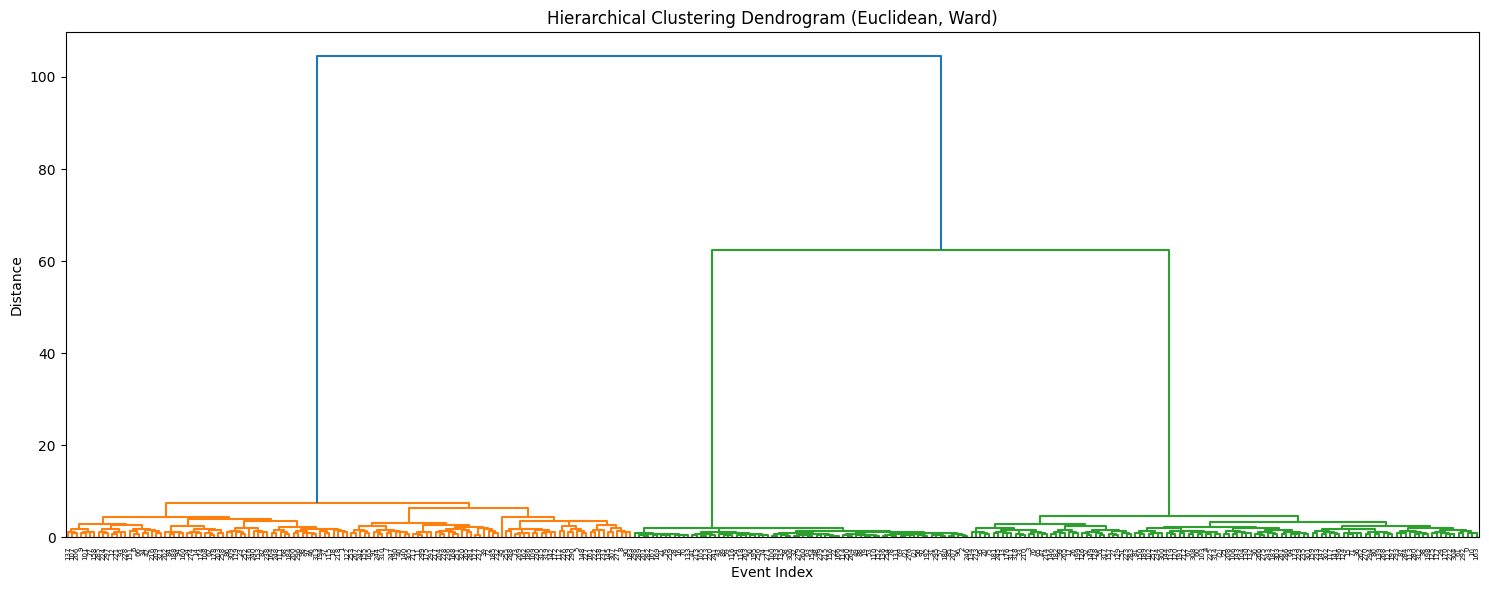

In [5]:
best_Z = linkage_matrices[("euclidean", "ward")]
plt.figure(figsize=(15, 6))
dendrogram(best_Z, truncate_mode='level', p=10)
plt.title("Hierarchical Clustering Dendrogram (Euclidean, Ward)")
plt.xlabel("Event Index")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

In [9]:
num_clusters = 4
cluster_assignments = fcluster(Z, num_clusters, criterion='maxclust')
demand_dataset["Cluster"] = cluster_assignments

cluster_summary = demand_dataset.groupby("Cluster")[sales_columns].agg(['mean', 'count'])
cluster_summary.reset_index(inplace=True)

In [10]:
summary_text = []
for cluster in range(1, num_clusters + 1):
    cluster_data = demand_dataset[demand_dataset["Cluster"] == cluster]
    early_sales_avg = [round(cluster_data[str(i)].mean(), 2) for i in range(1, 5)]
    final_sales_avg = round(cluster_data["24"].mean(), 2)
    summary_text.append(
        f"Cluster {cluster}: {len(cluster_data)} events\n"
        f"  - Avg final cumulative sales (hour 24): {final_sales_avg}\n"
        f"  - Avg early sales (hour 1-4): {early_sales_avg}\n"
    )

"\n".join(summary_text)

'Cluster 1: 128 events\n  - Avg final cumulative sales (hour 24): 453.97\n  - Avg early sales (hour 1-4): [np.float64(68.25), np.float64(95.4), np.float64(96.61), np.float64(175.78)]\n\nCluster 2: 92 events\n  - Avg final cumulative sales (hour 24): 167.43\n  - Avg early sales (hour 1-4): [np.float64(13.66), np.float64(20.35), np.float64(28.73), np.float64(36.25)]\n\nCluster 3: 61 events\n  - Avg final cumulative sales (hour 24): 377.11\n  - Avg early sales (hour 1-4): [np.float64(41.8), np.float64(56.82), np.float64(74.95), np.float64(86.74)]\n\nCluster 4: 41 events\n  - Avg final cumulative sales (hour 24): 365.07\n  - Avg early sales (hour 1-4): [np.float64(42.37), np.float64(54.61), np.float64(64.95), np.float64(80.51)]\n'

In [ ]:
N = 20
prices = [100, 110, 120, 130, 140, 150]
M = len(prices)
K = 2600
a_values = [10, 11, 7, 8, 10, 5, 12, 7, 8, 9, 11, 6, 9, 10, 7, 8, 12, 11, 9, 8]


valid_price_combinations = []
for combo in itertools.product(prices, repeat=N):
    if sum(combo) == K:
        valid_price_combinations.append(combo)
        break  # only find the first optimal to save time

best_combo = valid_price_combinations[0]
demands = [(K - a_values[i] * best_combo[i]) / best_combo[i] for i in range(N)]
revenues = [best_combo[i] * demands[i] for i in range(N)]

solution = []
for i in range(N):
    solution.append({
        "Style": i + 1,
        "Price": best_combo[i],
        "a_i": a_values[i],
        "Demand": round(demands[i], 2),
        "Revenue": round(revenues[i], 2)
    })

solution_df = pd.DataFrame(solution)
total_revenue = sum(revenues)
solution_df["Total Revenue"] = ""
solution_df.loc[0, "Total Revenue"] = round(total_revenue, 2)

solution_df


In [ ]:
N = 20
prices = [100, 110, 120, 130, 140, 150]
M = len(prices)
K = 2600
a_values = [10, 11, 7, 8, 10, 5, 12, 7, 8, 9, 11, 6, 9, 10, 7, 8, 12, 11, 9, 8]

valid_price_combination = None
for combo in itertools.product(prices, repeat=N):
    if sum(combo) == K:
        valid_price_combination = combo
        break

if valid_price_combination:
    best_combo = valid_price_combination
    demands = [(K - a_values[i] * best_combo[i]) / best_combo[i] for i in range(N)]
    revenues = [best_combo[i] * demands[i] for i in range(N)]

    solution = []
    for i in range(N):
        solution.append({
            "Style": i + 1,
            "Price": best_combo[i],
            "a_i": a_values[i],
            "Demand": round(demands[i], 2),
            "Revenue": round(revenues[i], 2)
        })

    solution_df = pd.DataFrame(solution)
    solution_df["Total Revenue"] = ""
    solution_df.loc[0, "Total Revenue"] = round(sum(revenues), 2)
else:
    solution_df = pd.DataFrame([{"Error": "No valid price combination found for K=2600."}])

solution_df
